## Libraries

In [34]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *
from lib.intervention import *

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

## Specify experiment

In [36]:
expt_path = "../analysis/2020-06-07_intv-art/response"

## Load data

In [37]:
detect_df = pd.read_csv(os.path.join(expt_path, "crash_detection.csv"))
equil_df = pd.read_csv(os.path.join(expt_path, "crash_equilibrium.csv"))

## Crash Visualization

In [38]:
cut_axis_days = 365
genetic_names.update(op_names)
genetic_names.update({"mean_k": "C.O.I. (k)"})
genetic_grps.update(op_grps)

In [39]:
analysis_metrics = ["HX", "VX"] + ['frac_mixed_samples',
                                   'mean_k',
                                   'n_segregating',
                                   'pi',
                                   'theta',
                                   'avg_frac_ibd',
                                   'avg_n_ibd',
                                   'avg_l_ibd']

Text(0.5, 0, '[Months]')

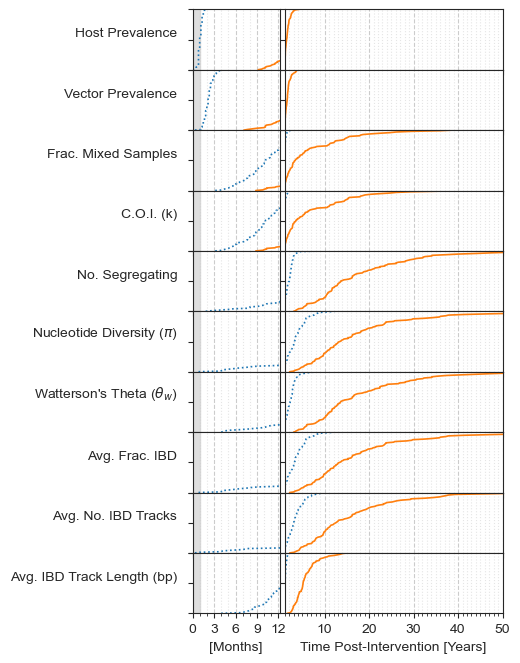

In [40]:
n_metrics = len(analysis_metrics)
fig, axes = plt.subplots(n_metrics, 1, figsize=(4, 8), sharex=True)
fig.subplots_adjust(hspace=0)

for ax, metric in zip(axes.flatten(), analysis_metrics):
    
    # Prepare slicing of axes
    divider = make_axes_locatable(ax)
    lax = divider.append_axes("left", size="40%", pad=0.05)
    
    # Prepare ECDF
    sd = np.sort(detect_df[metric])
    se = np.sort(equil_df[metric])
    cdd = np.linspace(0, 1, len(sd))
    cde = np.linspace(0, 1, len(se))
    
    # Plot in right axis
    ax.plot(sd, cdd, linestyle='dotted', linewidth=1.2)
    ax.plot(se, cde, linestyle='solid', linewidth=1.2)
    
    # Plot in left axis
    lax.plot(sd, cdd, linestyle='dotted', linewidth=1.2)
    lax.plot(se, cde, linestyle='solid', linewidth=1.2)
    
    # Patch delineating Intervention Window
    lax.add_patch(patches.Rectangle(xy=(0, lax.get_ylim()[0]), 
                                    width=30, 
                                    height=lax.get_ylim()[1]-lax.get_ylim()[0], 
                                    color='lightgrey', alpha=0.75, zorder=0))
    
    # Ticks, x-axis
    days_per_year = 365
    years_per_major_tick = 10
    ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

    lax.xaxis.set_major_locator(plt.MultipleLocator(90))
    lax.xaxis.set_minor_locator(plt.MultipleLocator(30))
    lax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, tick: int(val/30.)))
    
    
    # Tick Labels (None until last plot)
    ax.set_yticklabels("")
    lax.set_yticklabels("")
    ax.set_xticklabels("")
    lax.set_xticklabels("")
    
    # Grid
    lax.grid(axis='x', which='major', linestyle='dashed', linewidth=0.8)
    lax.grid(axis='x', which='minor', linestyle='dotted', linewidth=0.8, alpha=0.5)
    ax.grid(axis='x', which='major', linestyle='dashed', linewidth=0.8)
    ax.grid(axis='x', which='minor', linestyle='dotted', linewidth=0.8, alpha=0.5)
    
    # Labels
    lax.set_ylabel(genetic_names[metric], rotation='horizontal', ha='right')
    
    # Limits
    lax.set_xlim(0, cut_axis_days)
    ax.set_xlim(cut_axis_days, 365*50)
    lax.set_ylim((0, 1))
    ax.set_ylim((0, 1))
    
    
# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 10
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

lax.xaxis.set_major_locator(plt.MultipleLocator(90))
lax.xaxis.set_minor_locator(plt.MultipleLocator(30))
lax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, tick: int(val/30.)))

# Labels
ax.set_xlabel("Time Post-Intervention [Years]")
lax.set_xlabel("[Months]")

## All three interventions

## Specify experiment

In [41]:
expt_path = "../analysis/2020-06-07_intv-%s/response"

In [42]:
art_d = pd.read_csv(os.path.join(expt_path % "art", "crash_detection.csv"))
art_e = pd.read_csv(os.path.join(expt_path % "art", "crash_equilibrium.csv"))

In [43]:
bed_d = pd.read_csv(os.path.join(expt_path % "bed", "crash_detection.csv"))
bed_e = pd.read_csv(os.path.join(expt_path % "bed", "crash_equilibrium.csv"))

In [44]:
ins_d = pd.read_csv(os.path.join(expt_path % "ins", "crash_detection.csv"))
ins_e = pd.read_csv(os.path.join(expt_path % "ins", "crash_equilibrium.csv"))

In [45]:
dfs = [(art_d, art_e), (bed_d, bed_e), (ins_d, ins_e)]
cols = [sns.color_palette("Blues", 6)[4], 
        sns.color_palette("Reds", 6)[4],
       sns.color_palette("Greens", 6)[4]]

Text(0.5, 0, '[Months]')

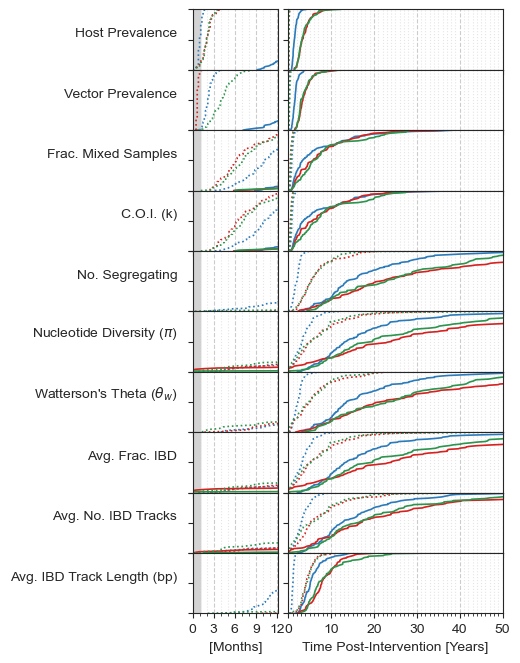

In [46]:
n_metrics = len(analysis_metrics)
fig, axes = plt.subplots(n_metrics, 1, figsize=(4, 8), sharex=True)
fig.subplots_adjust(hspace=0)

for ax, metric in zip(axes.flatten(), analysis_metrics):
    
            
    # Prepare slicing of axes
    divider = make_axes_locatable(ax)
    lax = divider.append_axes("left", size="40%", pad=0.1)
    
    for col, df in zip(cols, dfs):
        detect_df, equil_df = df

        # Prepare ECDF
        sd = np.sort(detect_df[metric])
        se = np.sort(equil_df[metric])
        cdd = np.linspace(0, 1, len(sd))
        cde = np.linspace(0, 1, len(se))

        # Plot in right axis
        ax.plot(sd, cdd, linestyle='dotted', linewidth=1.2, color=col)
        ax.plot(se, cde, linestyle='solid', linewidth=1.2, color=col)

        # Plot in left axis
        lax.plot(sd, cdd, linestyle='dotted', linewidth=1.2, color=col)
        lax.plot(se, cde, linestyle='solid', linewidth=1.2, color=col)

        # Patch delineating Intervention Window
        lax.add_patch(patches.Rectangle(xy=(0, lax.get_ylim()[0]), 
                                        width=30, 
                                        height=lax.get_ylim()[1]-lax.get_ylim()[0], 
                                        color='lightgrey', alpha=0.75, zorder=0))

        # Ticks, x-axis
        days_per_year = 365
        years_per_major_tick = 10
        ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
        ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

        lax.xaxis.set_major_locator(plt.MultipleLocator(90))
        lax.xaxis.set_minor_locator(plt.MultipleLocator(30))
        lax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, tick: int(val/30.)))


        # Tick Labels (None until last plot)
        ax.set_yticklabels("")
        lax.set_yticklabels("")
        ax.set_xticklabels("")
        lax.set_xticklabels("")

        # Grid
        lax.grid(axis='x', which='major', linestyle='dashed', linewidth=0.8)
        lax.grid(axis='x', which='minor', linestyle='dotted', linewidth=0.8, alpha=0.5)
        ax.grid(axis='x', which='major', linestyle='dashed', linewidth=0.8)
        ax.grid(axis='x', which='minor', linestyle='dotted', linewidth=0.8, alpha=0.5)

        # Labels
        lax.set_ylabel(genetic_names[metric], rotation='horizontal', ha='right')

        # Limits
        lax.set_xlim(0, cut_axis_days)
        ax.set_xlim(0, 365*50)
        lax.set_ylim((0, 1))
        ax.set_ylim((0, 1))
    
    
# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 10
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

lax.xaxis.set_major_locator(plt.MultipleLocator(90))
lax.xaxis.set_minor_locator(plt.MultipleLocator(30))
lax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, tick: int(val/30.)))

# Labels
ax.set_xlabel("Time Post-Intervention [Years]")
lax.set_xlabel("[Months]")

## Specify experiment

In [47]:
expt_path = "../analysis/2020-06-07_intv-%s/response"

In [48]:
art_d = pd.read_csv(os.path.join(expt_path % "art", "recovery_detection.csv"))
art_e = pd.read_csv(os.path.join(expt_path % "art", "recovery_equilibrium.csv"))

In [49]:
bed_d = pd.read_csv(os.path.join(expt_path % "bed", "recovery_detection.csv"))
bed_e = pd.read_csv(os.path.join(expt_path % "bed", "recovery_equilibrium.csv"))

In [50]:
ins_d = pd.read_csv(os.path.join(expt_path % "ins", "recovery_detection.csv"))
ins_e = pd.read_csv(os.path.join(expt_path % "ins", "recovery_equilibrium.csv"))

In [51]:
dfs = [(art_d, art_e), (bed_d, bed_e), (ins_d, ins_e)]
cols = [sns.color_palette("Blues", 6)[4], 
        sns.color_palette("Reds", 6)[4],
       sns.color_palette("Greens", 6)[4]]

Locator attempting to generate 1040 ticks ([-4230.0, ..., 89280.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1132 ticks ([-4680.0, ..., 97110.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1157 ticks ([-4770.0, ..., 99270.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1132 ticks ([-4680.0, ..., 97110.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 0, '[Months]')

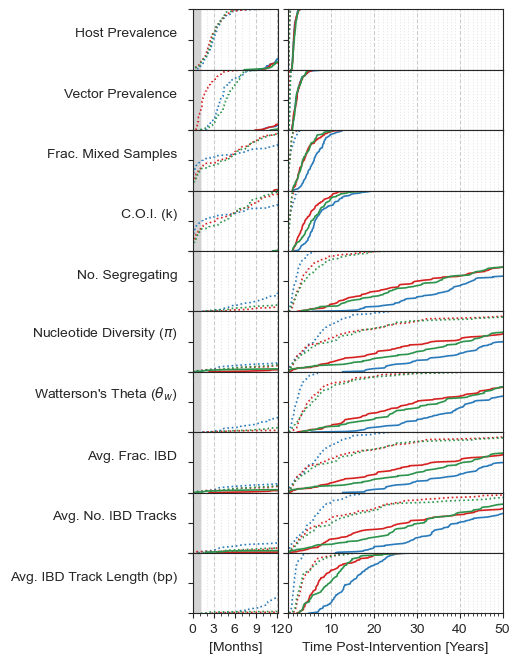

In [52]:
n_metrics = len(analysis_metrics)
fig, axes = plt.subplots(n_metrics, 1, figsize=(4, 8), sharex=True)
fig.subplots_adjust(hspace=0)

for ax, metric in zip(axes.flatten(), analysis_metrics):
    
            
    # Prepare slicing of axes
    divider = make_axes_locatable(ax)
    lax = divider.append_axes("left", size="40%", pad=0.1)
    
    for col, df in zip(cols, dfs):
        detect_df, equil_df = df

        # Prepare ECDF
        sd = np.sort(detect_df[metric])
        se = np.sort(equil_df[metric])
        cdd = np.linspace(0, 1, len(sd))
        cde = np.linspace(0, 1, len(se))

        # Plot in right axis
        ax.plot(sd, cdd, linestyle='dotted', linewidth=1.2, color=col)
        ax.plot(se, cde, linestyle='solid', linewidth=1.2, color=col)

        # Plot in left axis
        lax.plot(sd, cdd, linestyle='dotted', linewidth=1.2, color=col)
        lax.plot(se, cde, linestyle='solid', linewidth=1.2, color=col)

        # Patch delineating Intervention Window
        lax.add_patch(patches.Rectangle(xy=(0, lax.get_ylim()[0]), 
                                        width=30, 
                                        height=lax.get_ylim()[1]-lax.get_ylim()[0], 
                                        color='lightgrey', alpha=0.75, zorder=0))

        # Ticks, x-axis
        days_per_year = 365
        years_per_major_tick = 10
        ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
        ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

        lax.xaxis.set_major_locator(plt.MultipleLocator(90))
        lax.xaxis.set_minor_locator(plt.MultipleLocator(30))
        lax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, tick: int(val/30.)))


        # Tick Labels (None until last plot)
        ax.set_yticklabels("")
        lax.set_yticklabels("")
        ax.set_xticklabels("")
        lax.set_xticklabels("")

        # Grid
        lax.grid(axis='x', which='major', linestyle='dashed', linewidth=0.8)
        lax.grid(axis='x', which='minor', linestyle='dotted', linewidth=0.8, alpha=0.5)
        ax.grid(axis='x', which='major', linestyle='dashed', linewidth=0.8)
        ax.grid(axis='x', which='minor', linestyle='dotted', linewidth=0.8, alpha=0.5)

        # Labels
        lax.set_ylabel(genetic_names[metric], rotation='horizontal', ha='right')

        # Limits
        lax.set_xlim(0, cut_axis_days)
        ax.set_xlim(0, 365*50)
        lax.set_ylim((0, 1))
        ax.set_ylim((0, 1))
    
    
# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 10
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

lax.xaxis.set_major_locator(plt.MultipleLocator(90))
lax.xaxis.set_minor_locator(plt.MultipleLocator(30))
lax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, tick: int(val/30.)))

# Labels
ax.set_xlabel("Time Post-Intervention [Years]")
lax.set_xlabel("[Months]")